         RND      ADMIN        MKT       STATE     PROFIT
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94
Mean Squared Error: 135346231.77903003
R-squared: 0.8328629827639696


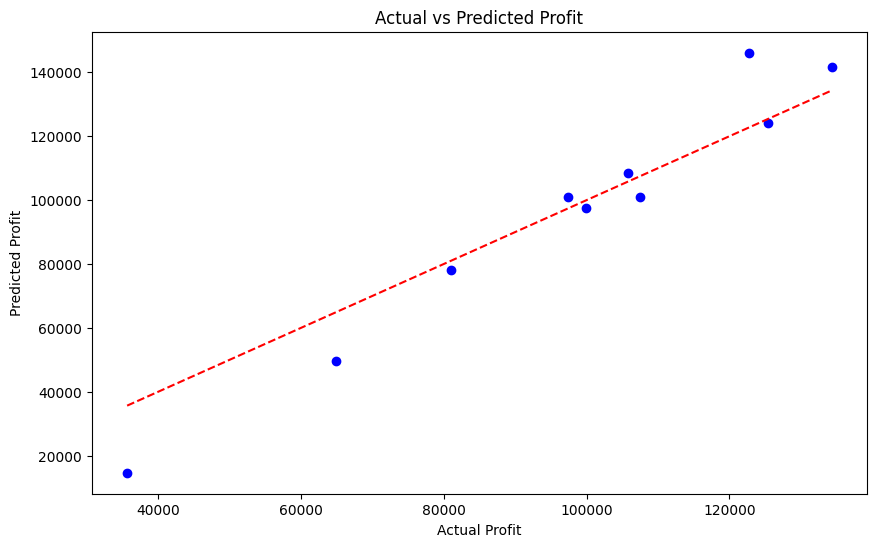

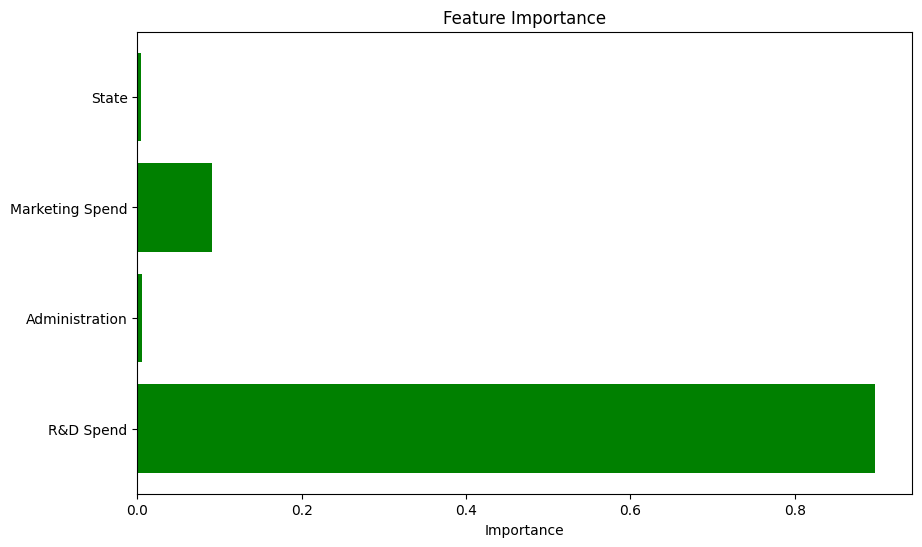

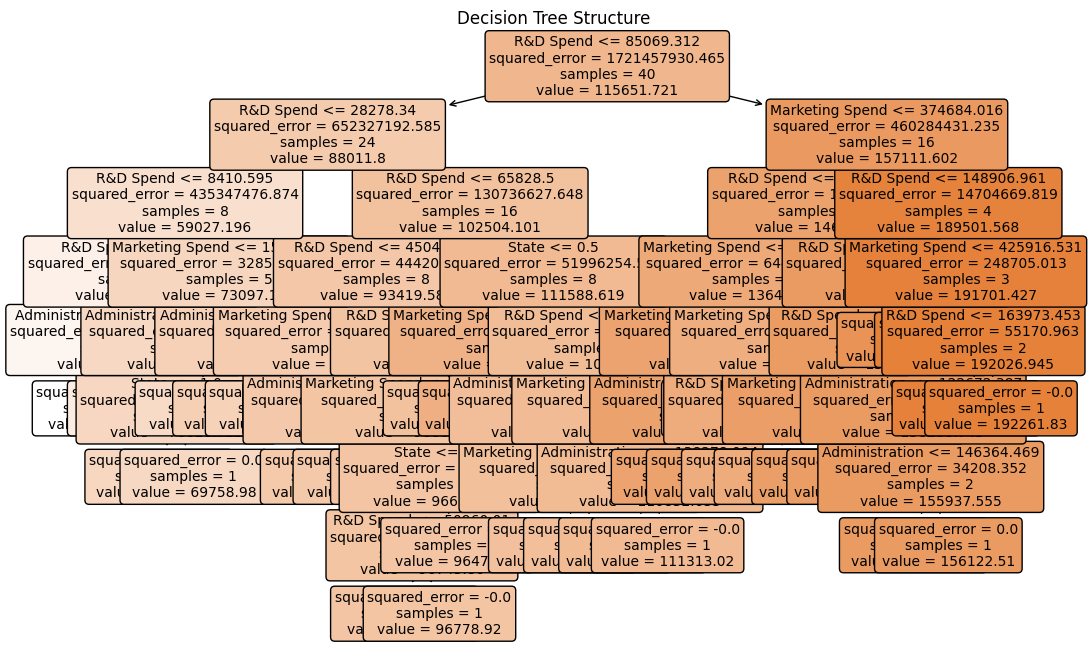

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('50_Startups.csv')

# Display the first few rows of the dataset
print(df.head())

# Encode categorical data (State column)
labelencoder = LabelEncoder()
df['STATE'] = labelencoder.fit_transform(df['STATE'])

# Define features (X) and target (y)
X = df.drop('PROFIT', axis=1).values  # Features: R&D Spend, Administration, Marketing Spend, State
y = df['PROFIT'].values  # Target: Profit

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting actual vs predicted values for the test set
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

# Feature Importance
importances = regressor.feature_importances_
features = ['R&D Spend', 'Administration', 'Marketing Spend', 'State']

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(features, importances, color='green')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

# If you need to visualize the decision tree (optional)
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(regressor, filled=True, feature_names=features, rounded=True, fontsize=10)
plt.title('Decision Tree Structure')
plt.show()
